In [1]:
import pandas as pd
import pickle as pkl
import os

In [12]:
# Modified code to only load predictions_dict.pkl
path = os.path.join(os.getcwd(), "data")
file_column, language_column = [], []

# Directly target the predictions_dict.pkl file
pkl_filename = "predictions_dict.pkl"
pkl_path = os.path.join(path, pkl_filename)

if os.path.exists(pkl_path):
    try:
        with open(pkl_path, 'rb') as f:
            curr_dict = pkl.load(f)
            print(f"Loaded {pkl_filename}:", curr_dict)
            for key, value in curr_dict.items():
                file_column.append(key)
                language_column.append(value)
    except TypeError as e:
        print(f"Error processing {pkl_filename}: {e}")
    except Exception as e:
        print(f"Unexpected error with {pkl_filename}: {e}")
else:
    print(f"File not found: {pkl_path}")

Loaded predictions_dict.pkl: {'acoruna_barco_m67780_a84524_audio_converted.mp3': 'Galician', 'barcelona_Ovvero_m68255_a84999_audio_converted.mp3': 'Bosnian', 'berlin_Dirk_m67384_a84128_audio_converted.mp3': 'German', 'cuenca_Amalia_m69879_a86623_audio_converted.mp3': 'Spanish', 'elbarcelonC3A8s_Martagosa_m71623_a88367_audio_converted.mp3': 'Catalan'}


In [13]:
db = pd.DataFrame.from_dict({"file":file_column,"language":language_column})
db

,file,language
0,acoruna_barco_m67780_a84524_audio_converted.mp3,Galician
1,barcelona_Ovvero_m68255_a84999_audio_converted...,Bosnian
2,berlin_Dirk_m67384_a84128_audio_converted.mp3,German
3,cuenca_Amalia_m69879_a86623_audio_converted.mp3,Spanish
4,elbarcelonC3A8s_Martagosa_m71623_a88367_audio_...,Catalan


In [14]:
db['language'].unique()

array(['Galician', 'Bosnian', 'German', 'Spanish', 'Catalan'],
      dtype=object)

In [15]:
x, y = [], []
for i,j in zip(db['language'].value_counts().index, db['language'].value_counts()):
    x.append(j)
    y.append(i)

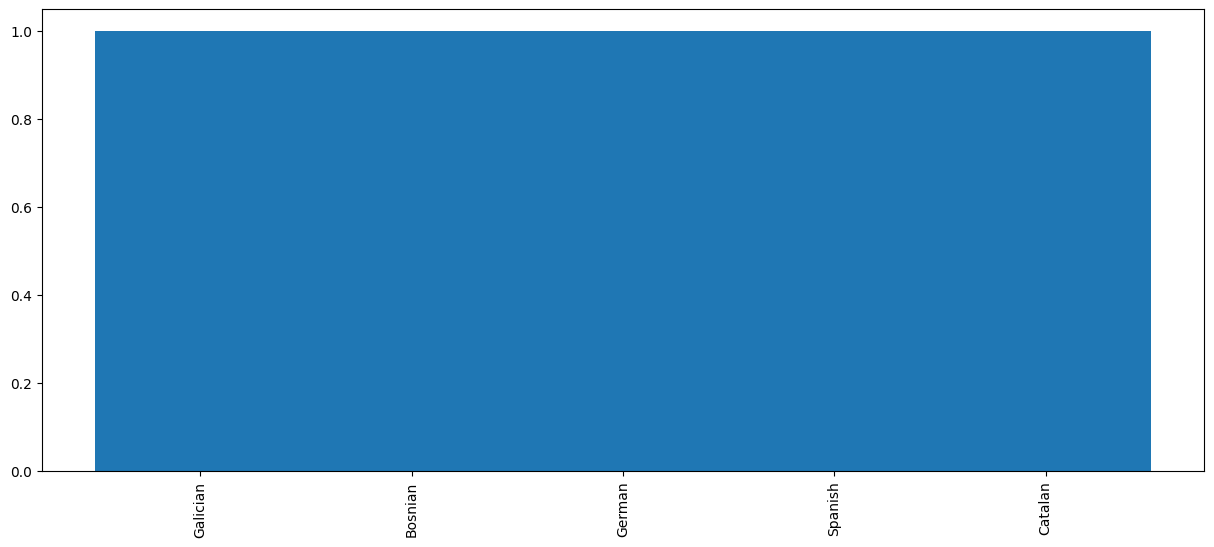

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.bar(y, x, width = 1)
plt.xticks(rotation=90)
plt.show()

There are too many languages with close to zero values, they could be removed and a numbre should be decided in the future. For testing I set it to -1 to pick everything

In [17]:
languages_to_use = []
for i,j in zip(db['language'].value_counts().index, db['language'].value_counts()):
    if j > -1:
        languages_to_use.append(i)
languages_to_use

['Galician', 'Bosnian', 'German', 'Spanish', 'Catalan']

In [18]:
db.loc[db['language'].isin(languages_to_use)]

,file,language
0,acoruna_barco_m67780_a84524_audio_converted.mp3,Galician
1,barcelona_Ovvero_m68255_a84999_audio_converted...,Bosnian
2,berlin_Dirk_m67384_a84128_audio_converted.mp3,German
3,cuenca_Amalia_m69879_a86623_audio_converted.mp3,Spanish
4,elbarcelonC3A8s_Martagosa_m71623_a88367_audio_...,Catalan


In [19]:
db.to_csv(path+"/"+"file_language.csv")